In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import warnings

import allinone as aio

%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 150)

In [2]:
df = pd.read_excel('HW_Data_Set.xlsx')
df.head(3)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,ind_49,ind_50,ind_51,ind_52,ind_53,ind_56,ind_58,ind_61,ind_62,ind_65,ind_67,ind_70,ind_71,ind_74,ind_77,ind_82,ind_83,ind_88,ind_92,ind_102,ind_109,ind_116,ind_118,ind_122,ind_124,ind_128,ind_130,ind_132,ind_134,ind_136,ind_139,ind_142,ind_145,ind_147,ind_150,ind_153,ind_156,ind_164,ind_168,ind_172,ind_176,ind_179,ind_181,ind_188,ind_194,ind_212,ind_217,ind_225,ind_228,ind_234,ind_237,ind_239,ind_241,ind_243,ind_309,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,12.060000,9.1100,2,15,13,1,56,0.002690,-0.002670,0.000010,66.666667,93.692449,146.592674,150.505806,154.486989,158.009516,142.421114,142.023350,196.592517,184.819232,31.939605,3,30.752568,-5,-22,-22,-21,-23,-36,-40,-43,-71,-93,-18,24,19,-5,-4,10,9,-3,-3,8,8,8,-2,8,0.000517,20.198253,41.915016,GREEN,-13,0.002523,-3,-25,-50,-83,-125,6,6,60.077747,60.975437,0.228496,81.390001,70.987678,67.107082,58.888561,-23.189737,-12.212712,8.133485,-39.935439,7.45,7.99,96.268657,96.268657,72.470277,1,0.039883,1.20086,0.00016,10.000000,0.000217,99.736250,1.200346,-0.000013,-1.524694,97.980028,1.179209,-0.756946,98.905563,1.190348,99.156641,-0.000062,12.056738,-0.157039,20.967742,-0.000091,1.197238,-0.319064,0.0,0.0,0.0,0.0,0.0,0.0,-3.731343,-32.587430,-26.386973,-0.003323,0.045130,-0.044678,-44,-23,-27,0.002371,2.0,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,11.326667,9.2225,0,11,11,1,63,0.002729,-0.003111,-0.000191,66.666667,76.694104,140.227205,156.903278,161.604303,169.720843,152.634492,149.634976,201.738617,191.985663,38.478501,3,36.812130,-6,-18,-24,-24,-25,-38,-43,-45,-73,-96,-15,20,20,-7,-5,10,9,-4,-3,8,8,8,-2,8,0.000401,17.870633,44.895122,GREEN,-16,0.003019,-3,-28,-54,-88,-130,5,6,67.247491,64.078479,0.289838,84.135420,72.526560,67.956115,59.182324,-18.315789,-2.463107,20.369365,-32.824223,14.46,16.65,98.630137,98.630137,79.199436,1,0.039863,1.20070,0.00016,9.090909,0.000217,99.668519,1.200129,-0.000013,-1.523934,97.932319,1.179223,-0.756569,98.859627,1.190389,99.111914,-0.000062,11.971831,-0.156961,20.800000,-0.000091,1.197328,-0.318905,0.0,0.0,0.0,0.0,0.0,0.0,-1.369863,-38.115965,-26.085949,-0.000476,0.035314,-0.034961,-48,-16,-31,0.003074,0.8,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,5,15,9,-1,65,0.002780,-0.003530,-0.000375,66.666667,83.909974,117.755945,154.452274,164.015689,175.947530,160.181486,155.527932,205.238017,197.993551,28.917197,3,39.648290,-4,-11,-21,-22,-24,-36,-42,-44,-72,-95,-13,17,19,-9,-6,11,10,-4,-4,8,8,8,-2,8,0.000392,12.436570,45.087799,GREEN,-15,0.003353,-1,-28,-54,-89,-132,5,3,72.441065,66.409997,0.188476,85.392211,73.224112,68.345231,59.318698,-9.289649,7.346277,24.829522,-24.435774,12.88,17.65,95.721078,95.721078,82.241467,1,0.039854,1.20054,0.00016,8.333333,0.000217,99.627319,1.199911,-0.000013,-1.523580,97.910664,1.179236,-0.756393,98.839991,1.190429,99.093554,-0.000062,11.888112,-0.156925,20.634921,-0.000091,1.197419,-0.318831,0.0,0.0,0.0,0.0,0.0,0.0,-4.278922,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48,-10,-30,0.003561,2.7,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805


In [4]:
dsc = aio.describe(df)
dsc.T

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,ind_49,ind_50,ind_51,ind_52,ind_53,ind_56,ind_58,ind_61,ind_62,ind_65,ind_67,ind_70,ind_71,ind_74,ind_77,ind_82,ind_83,ind_88,ind_92,ind_102,ind_109,ind_116,ind_118,ind_122,ind_124,ind_128,ind_130,ind_132,ind_134,ind_136,ind_139,ind_142,ind_145,ind_147,ind_150,ind_153,ind_156,ind_164,ind_168,ind_172,ind_176,ind_179,ind_181,ind_188,ind_194,ind_212,ind_217,ind_225,ind_228,ind_234,ind_237,ind_239,ind_241,ind_243,ind_309,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
dtype,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,object,int64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,int64,object,object,float64,float64,float64,float64,float64,float64
count,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167
mean,-0.803146,-0.80347,48.3889,48.2893,0.0996085,49.4889,-18.4975,11.7715,11.7735,11.7734,11.7722,11.7561,-0.26804,-0.723528,-0.4443,-25.971,24.9452,0.0022155,-0.00226407,-2.42872e-05,1.04859,0.913289,1.59603,1.10219,-0.276875,-3.0871,-5.20256,-6.1914,-8.3769,-12.2988,-0.142528,3.49327,-1.0712,0.0413491,0.0997243,0.198962,0.296579,0.342792,0.377493,0.460353,0.680558,2.02627,3.4837,0.101832,-0.15891,0.0165396,0.108481,0.108318,-0.0552943,-0.495379,0.113021,0.110589,-0.856494,-0.963029,-1.04605,0.087725,-0.431977,1.59624e-07,-0.0887881,-0.884991,NaN,-0.00502676,-8.28352e-05,0.0223772,0.248257,1.06048,2.78888,5.2121,-0.0515648,-0.0616183,49.8017,49.3119,-0.00679841,49.8757,49.4148,49.3815,49.5624,-0.0532785,-0.0448806,-0.0586545,-0.0836428,-0.0525312,-0.0511432,50.3474,50.7148,51.4239,0.988811,0.00607428,1.20372,2.46695e-05,55.2782,7.05665e-05,90.0491,1.0883,-3.24633e-05,-0.422692,95.137,1.15246,-0.674508,80.625,0.980187,68.3915,-7.40288e-05,24.7047,-0.167167,15.7573,-2.23386e-05,0.12718,-0.0147817,-6.07119e-06,-0.00639911,1.21048,-1.12421e-06,0.259444,0.14569,-49.2813,0.508078,-0.0119782,-3.84965e-05,3.90684e-06,-3.86906e-06,0.985568,0.0992379,0.239987,0.000223838,28.5292,-8.55479,-28.1667,NaN,NaN,0.490297,0.498188,0.490174,-0.0571017,-2.90636,-3.31507
std,23.62

In [3]:
df.replace('?', np.nan, inplace = True)

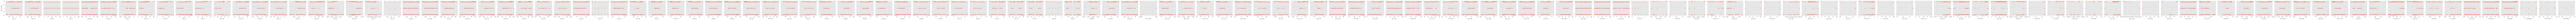

In [6]:
sns.pairplot(data=df, y_vars = ["90_target"], x_vars = df.columns);

In [3]:
dfCopy = df.copy()

In [4]:
def categorization(df):
    if df['90_target'] < -30:
        return 'T-'
    if df['90_target'] == 0:
        return 'T0'
    if df['90_target'] > +30:
        return 'T+'
dfCopy['category'] = dfCopy.apply(lambda dfCopy:categorization(dfCopy), axis=1)

dfPos = dfCopy[dfCopy['category'] == 'T+']
dfNeg = dfCopy[dfCopy['category'] == 'T-']

<Figure size 1296x504 with 0 Axes>

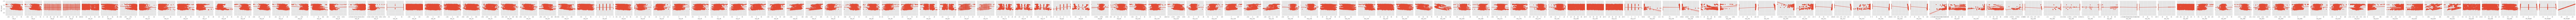

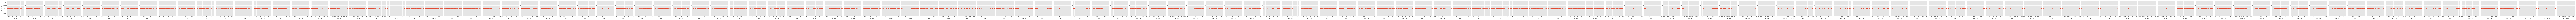

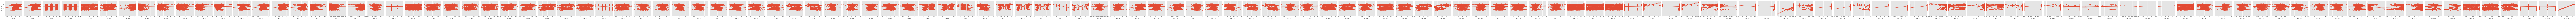

In [9]:
plt.figure(figsize=(18, 7))
for i, cat in enumerate(['T-','T0','T+'], 1):
    sns.pairplot(data=dfCopy[dfCopy['category'] == cat], y_vars = ['90_target'], x_vars = dfCopy.select_dtypes(exclude=['object']).columns, kind='reg');

### Yüksek Korelasyon

In [11]:
dfCopy[dfCopy['category'] == 'T+'].corr()['90_target'][dfCopy[dfCopy['category'] == 'T+'].corr()['90_target'] > 0.30].index

Index(['ind_83', 'ind_156', 'ind_237', 'ind_309', 'ind_316', 'ind_318',
       'ind_321', '90_target'],
      dtype='object')

In [15]:
dfCorr_high = dfPos[['ind_83', 'ind_156', 'ind_237', 'ind_309', 'ind_316', 'ind_318', 'ind_321']].corr()
dfCorr_high.style.background_gradient(axis=None)

,ind_83,ind_156,ind_237,ind_309,ind_316,ind_318,ind_321
ind_83,1.000000,0.796209,0.214965,0.124884,0.338505,0.349567,0.436956
ind_156,0.796209,1.000000,0.109228,0.166057,0.529280,0.542675,0.601065
ind_237,0.214965,0.109228,1.000000,0.109182,0.012809,0.036697,0.075842
ind_309,0.124884,0.166057,0.109182,1.000000,0.289739,0.301668,0.306455
ind_316,0.338505,0.529280,0.012809,0.289739,1.000000,0.998452,0.680148
ind_318,0.349567,0.542675,0.036697,0.301668,0.998452,1.000000,0.690443
ind_321,0.436956,0.601065,0.075842,0.306455,0.680148,0.690443,1.000000


In [ ]:
dfPos[['ind_83', 'ind_237', 'ind_309', 'ind_316']] # high

### Düşük Korelasyon

In [17]:
dfCopy[dfCopy['category'] == 'T+'].corr()['90_target'][dfCopy[dfCopy['category'] == 'T+'].corr()['90_target'] < -0.20].index

Index(['ind_50', 'ind_51', 'ind_70', 'ind_82', 'ind_130', 'ind_132', 'ind_241',
       'ind_310', 'ind_315'],
      dtype='object')

In [18]:
dfCorr_low = dfPos[['ind_50', 'ind_51', 'ind_70', 'ind_82', 'ind_130', 'ind_132', 'ind_241', 'ind_310', 'ind_315']].corr()
dfCorr_low.style.background_gradient(axis=None)

,ind_50,ind_51,ind_70,ind_82,ind_130,ind_132,ind_241,ind_310,ind_315
ind_50,1.000000,0.958404,0.939624,0.751208,0.991001,0.895279,0.403676,0.070273,0.170889
ind_51,0.958404,1.000000,0.885423,0.837703,0.952429,0.973808,0.412241,0.081015,0.184656
ind_70,0.939624,0.885423,1.000000,0.724012,0.950867,0.828706,0.409759,0.076888,0.156421
ind_82,0.751208,0.837703,0.724012,1.000000,0.763802,0.896394,0.467642,0.146034,0.290137
ind_130,0.991001,0.952429,0.950867,0.763802,1.000000,0.897354,0.418606,0.087813,0.173759
ind_132,0.895279,0.973808,0.828706,0.896394,0.897354,1.000000,0.437065,0.119801,0.210718
ind_241,0.403676,0.412241,0.409759,0.467642,0.418606,0.437065,1.000000,-0.063497,0.177006
ind_310,0.070273,0.081015,0.076888,0.146034,0.087813,0.119801,-0.063497,1.000000,-0.028450
ind_315,0.170889,0.184656,0.156421,0.290137,0.173759,0.210718,0.177006,-0.028450,1.000000


In [ ]:
dfPos[['ind_50', 'ind_241', 'ind_310', 'ind_315']] #low

### Seçilen Değişkenler

In [19]:
dfPos[['ind_83', 'ind_237', 'ind_309', 'ind_316', 'ind_50', 'ind_241', 'ind_310', 'ind_315']].corr().style.background_gradient(axis=None) #all

,ind_83,ind_237,ind_309,ind_316,ind_50,ind_241,ind_310,ind_315
ind_83,1.000000,0.214965,0.124884,0.338505,-0.603885,-0.381774,-0.021681,-0.239036
ind_237,0.214965,1.000000,0.109182,0.012809,0.010318,-0.165731,-0.183246,0.065551
ind_309,0.124884,0.109182,1.000000,0.289739,0.037520,-0.115668,0.030929,-0.166726
ind_316,0.338505,0.012809,0.289739,1.000000,-0.369491,-0.166681,-0.079580,-0.386387
ind_50,-0.603885,0.010318,0.037520,-0.369491,1.000000,0.403676,0.070273,0.170889
ind_241,-0.381774,-0.165731,-0.115668,-0.166681,0.403676,1.000000,-0.063497,0.177006
ind_310,-0.021681,-0.183246,0.030929,-0.079580,0.070273,-0.063497,1.000000,-0.028450
ind_315,-0.239036,0.065551,-0.166726,-0.386387,0.170889,0.177006,-0.028450,1.000000


### Kateorik Değişkenler

In [20]:
stats.f_oneway(*(dfPos[dfPos['ind_8'] == val]['90_target'] for val in dfPos['ind_8'].unique()))

F_onewayResult(statistic=2.1961016795367456, pvalue=0.006220000365980967)

In [21]:
stats.levene(*(dfPos[dfPos['ind_109'] == val]['90_target'] for val in dfPos['ind_109'].unique()))

LeveneResult(statistic=0.41136499488111045, pvalue=0.5213305444220665)

In [23]:
stats.ttest_ind(*(dfPos[dfPos['ind_109'] == val]['90_target'] for val in dfPos['ind_109'].unique()), equal_var=True)

Ttest_indResult(statistic=0.6875604021805278, pvalue=0.4917871949597681)

# Model

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from statsmodels.tsa.stattools import acf

In [26]:
Y = dfPos['90_target']
X = dfPos[['ind_83', 'ind_237', 'ind_309', 'ind_321','ind_50', 'ind_241', 'ind_310', 'ind_315']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [27]:
model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)

### Varsayımlar

- Hata terimlerinin ortalaması 0 olması beklenir.

In [28]:
errors = y_test - y_pred
print("Ortalama Hata: {:.10f}".format(np.mean(errors)))

Ortalama Hata: -0.0159021062


- Modelin homoscedasticity davranış sergilemesi beklenir.

LeveneResult(statistic=0.3544767458161392, pvalue=0.551711408175297)

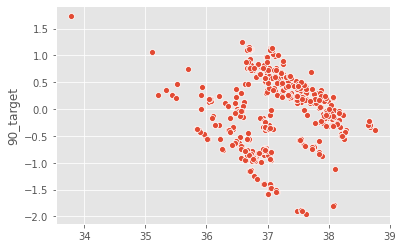

In [35]:
sns.scatterplot(x=y_pred, y=errors);
stats.levene(y_pred, errors)

- Hata terimleri birbiriyle ilişkisiz olmalıdır.

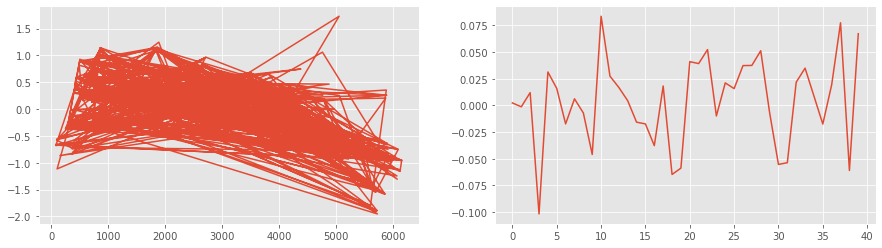

In [38]:
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.plot(errors)
plt.subplot(1, 2, 2)
plt.plot(acf(errors,fft=True)[1:]);

- Hata terimleri normal olarak dağılmalıdır.

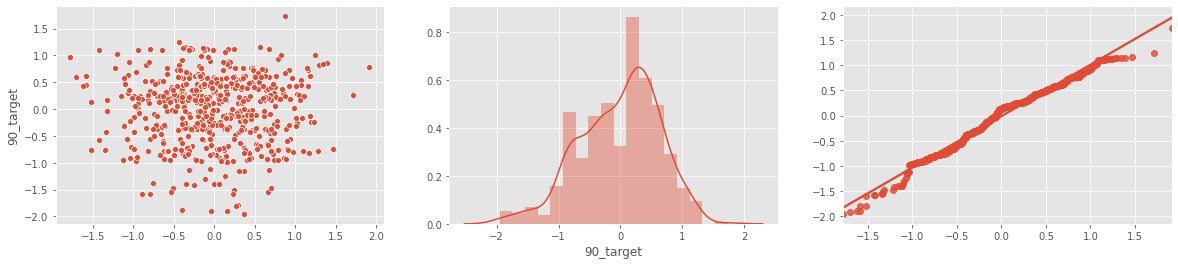

ShapiroResult(statistic=0.9800796508789062, pvalue=7.125470915525511e-07)

In [34]:
randomNumber = np.random.normal(np.mean(errors), np.std(errors), len(errors))
plt.figure(figsize=(20,4))
plt.subplot(1, 3, 1)
sns.scatterplot(x=randomNumber, y=errors)
plt.subplot(1, 3, 2)
sns.distplot(errors)
plt.subplot(1, 3, 3)
sns.regplot(np.sort(randomNumber), np.sort(errors))
plt.show()
stats.shapiro(errors)

In [5]:
Y1 = dfPos['90_target']
X1 = [dfPos[['ind_83', 'ind_237', 'ind_309', 'ind_321','ind_50', 'ind_241', 'ind_310', 'ind_315']]]

In [6]:
aio.perfstats(X1, Y1)

,model,rsq,rsq_adj,f_value,aic,bic,mae,mse,rmse,mape
1,model_1,0.499,0.497,274.567,4202.389,4253.729,0.519,0.402,0.634,1.407


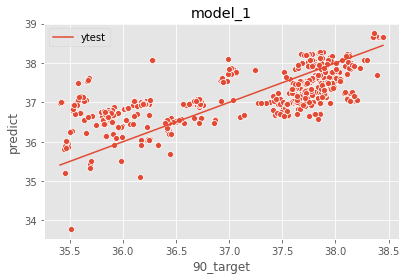

In [7]:
plt.figure(figsize=(16,4))
aio.predplts(X1, Y1)

In [8]:
aio.regstats(X1, Y1)

,model,rsq_train,rsq_test,subt_rsq,mae_test,mse_test,rmse_test,mape_test
1,model_1,0.499,0.487,0.012,0.519,0.402,0.634,1.407


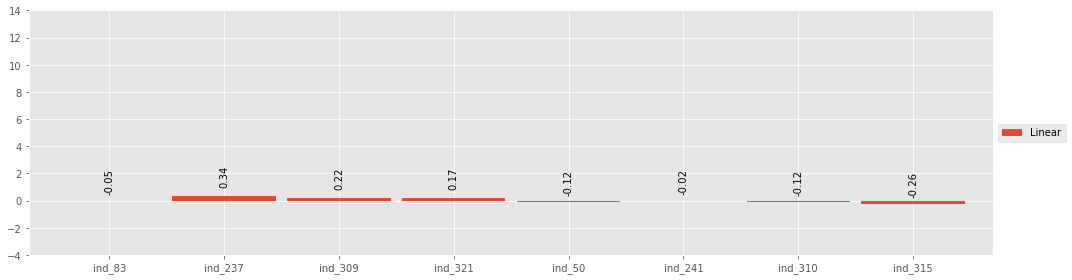

In [10]:
Y2 = dfPos['90_target']
X2 = dfPos[['ind_83', 'ind_237', 'ind_309', 'ind_321','ind_50', 'ind_241', 'ind_310', 'ind_315']]
aio.coefplts(X2, Y2)